# Cleaning Data
# 데이터 정제

## About the data
In this notebook, we will using daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). We will use the Global Historical Climatology Network - Daily (GHCND) dataset; see the documentation [here](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

This data was collected from the LaGuardia Airport station in New York City for October 2018. It contains:
- the daily minimum temperature (`TMIN`)
- the daily maximum temperature (`TMAX`)
- the daily average temperature (`TAVG`)

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

In addition, we will be using S&P 500 stock market data (obtained using the [`stock_analysis`](https://github.com/stefmolin/stock-analysis) package we will build in chapter 7) and data for bitcoin for 2017 through 2018. For the first edition, the bitcoin data was collected from CoinMarketCap using the `stock_analysis` package; however, changes in the website led to the necessity of changing the data source to Yahoo! Finance. The bitcoin data that was collected before the CoinMarketCap website change should be equivalent to the historical data that can be viewed on [this](https://coinmarketcap.com/currencies/bitcoin/historical-data/) page.

## Setup

In [1]:
import pandas as pd

df = pd.read_csv('data/nyc_temperatures.csv')
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


## Renaming Columns
## 컬럼 이름 변경

In [2]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

우리는 `value` 컬럼이 섭씨 온도라는 것을 나타내기 위해 이름을 변경하고, `attributes` 컬럼을 `flags`로 변경한다.

이를 위해 `rename()` 함수를 사용하고 딕셔너리 매핑을 이용한다. 기존의 DataFrame을 변경하기 위해 `inplace=True` 로 한다.

In [3]:
df.rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }, inplace=True
)

변경 성공.

In [4]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

`rename()`메서드로 컬럼들의 이름을 모두 대문자로 바꿀 수 있다.

In [5]:
df.rename(str.upper, axis='columns').columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

## Type Conversion
## 타입 변환
날짜와 같이 특정 유형이어야 하는 데이터가 종종 문자열로 저장된다. 이는 데이터가 결측될 수 있는 매우 타당한 이유가 될 수 있다. 텍스트로 인코딩된 결측 데이터의 경우 pandas는 결측 데이터를 읽을 때 결측 데이터를 허용하고자 문자열로 저장한다.
`date` 컬럼이 datetime 타입이 아니므로 바꿔주어야 한다.

In [6]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

`pd.to_datetime()` 사용

In [7]:
df.loc[:,'date'] = pd.to_datetime(df.date)
df.dtypes

/var/folders/rc/3jzqjhp56_v2qxb49fkb1x880000gn/T/ipykernel_70530/2239580266.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'date'] = pd.to_datetime(df.date)


date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

In [9]:
df.dtypes #변경 완료

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

`describe()` 메서드로 **date 컬럼의 요약통계** 확인

In [10]:
df.date.describe(datetime_is_numeric=True)

count                     93
mean     2018-10-16 00:00:00
min      2018-10-01 00:00:00
25%      2018-10-08 00:00:00
50%      2018-10-16 00:00:00
75%      2018-10-24 00:00:00
max      2018-10-31 00:00:00
Name: date, dtype: object

날짜 데이터는 다양한 형식과 시간대로 인해 다루기가 쉽지 않다. 다행히도 pandas는 datetime 객체를 변환하는 데 사용할 수 있는 많은 메서드를 제공한다. 예를 들어 `DatetimeIndex` 객체에서 시간대를 유지해야 하는 경우 `tz_localize()` 메서드를 사용해 datetime을 시간대와 연관시킬 수 있다.

freq = 'D' DAY(일)를 기준간격으로 데이터 생성

tz_localize('EST') 동부 시간대로 할당.

In [11]:
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

In [12]:
eastern = pd.read_csv(
    'data/nyc_temperatures.csv', index_col='date', parse_dates=True
).tz_localize('EST')
eastern.head()

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


`tz_convert()` 메서드를 사용하면 다른 시간대로 변경할 수 있다. UTC로 변경.

In [16]:
eastern.tz_convert('UTC').head() #UTC 시간대 (협정 세계시)

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


전체 날짜에는 신경 쓸 필요가 없다면 to_period()메서드를 사용해 datetime의 데이터를 잘라낼 수 있다. 예를 들어 월 단위로 데이터를 집계하는 경우 시간 인덱스를 연, 월 단위까지만 잘라 낸 다음 집계하면 된다.

PeriodArray 클래스에 시간대 정보가 없으면 pandas가 경고를 발생하므로 먼저 시간대 정보를 제거한다. 이는 PeriodIndex 객체 기본 데이터가 PeriodArray 객체로 저장되기 때문이다. 

In [18]:
eastern.tz_localize(None).to_period('M').index

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

`to_timestamp()` 메서드를 사용하면 `PeriodIndex` 객체를 `DatetimeIndex` 객체로 변환할 수 있지만, datetime이 모두 달의 첫째 날부터 시작한다.

In [20]:
eastern.tz_localize(None).to_period('M').to_timestamp().index

DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

추가로 `assign()` 메서드를 사용해 열 이름을 매개변수로, 그리고 해당 인수에 대한 값을 새로운 값으로 전달하면 모든 유형을 변환할 수 있다. 

아래 처럼 date 열을 datetime으로 캐스팅하고 화씨 온도의 새로운 열(temp_F)을 추가한다.

*assign() 메서드는 새로운 DataFrame 객체를 반환하므로 변수를 할당해야 한다.

In [21]:
df = pd.read_csv('data/nyc_temperatures.csv').rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }
)

new_df = df.assign(
    date=pd.to_datetime(df.date),
    temp_F=(df.temp_C * 9/5) + 32
)
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

화씨온도 생성 temp_F

In [24]:
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


`astype()` 메서드를 사용하면 한 번에 한 열씩 변환할 수 있다. 
예를 들어 astype('int') -> 소수점 이하를 저리고 정수형으로 캐스팅

In [25]:
df = df.assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_C_whole=lambda x: x.temp_C.astype('int'),
    temp_F=lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole=lambda x: x.temp_F.astype('int')
)

df.head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


station 컬럼과 datatype 컬럼에는 각각 고유한 값이 1개, 3개가 있는데, 이를 문자열로 저장하는 것은 메모리 사용이 효율적이지 않다. 더 나아가 분석에 있어서 잠재적인 문제가 있을 수 있다.

pandas에서는 열을 범주형으로 정의할 수 있다. astype('category')

In [26]:
df_with_categories = df.assign(
    station=df.station.astype('category'),
    datatype=df.datatype.astype('category')
)
df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

범주에 대한 요약 통계는 문자열에 대한 요약통계와 같다.

In [29]:
df_with_categories.describe(include='category')

,datatype,station
count,93,93
unique,3,1
top,TAVG,GHCND:USW00014732
freq,31,93


위의 범주 데이터에는 순서가 없지만 pandas는 순서를 지원한다.
pd.Categorical - 범주 생성, 범주 변경, 범주형 변수에서의 연산, 범주형 변수의 
시각화 

In [34]:
pd.Categorical(
    ['med', 'med', 'low', 'high'], 
    categories=['low', 'med', 'high'],
    ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

## Reordering, reindexing, and sorting
## 데이터 재정렬, 재인덱싱, 정렬
데이터를 하나 또는 여러 열을 기준으로 **데이터를 정렬**해야 할 때가 있다. 뉴욕시에서 2018년 10월 중 가장 높은 기온을 기록한 날을 찾고 싶다고 해보자.

temp_C 열의 값을 내림차 순으로 정렬한 다음, 상위 몇 개의 데이터를 살펴보려고 head()사용.
**sort_value()** 메서드를 사용하면 더 간단히 할 수 있다.

최고 온도만 잡아서, 상위 10일간 기온 보기

In [35]:
df[df.datatype == 'TMAX'].sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


10월 7일과 10일의 temp_C 값이 같고, 아래에도 같은 temp_C값이 같은 데이터가 있다.

temp_C에 따라서는 정렬이 되지만, 날짜로 한 번 더 정렬이 되지는 않는다.(위 결과는 우연?)

아래와 같이 리스트로 정렬해주고 싶은 컬럼을 넣어서 두 가지 컬럼으로 정렬 가능.

In [37]:
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True]).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


pandas에서 인덱스는 행과 관계가 있다. 행을 삭제하거나 필터링 혹은 행의 일부만 반환하는 작업을 하면 인덱스는 순서가 맞지 않을 수 있다. 현재 데이터에서 인덱스를 다시 정리해주려면 sort_value메서드에 `ignore_index=True` 인수를 전달한다.

In [38]:
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True], ignore_index=True).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
1,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
2,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
3,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
5,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
6,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
8,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
9,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


`nlargest()`: 정렬된 값의 부분집합을 살펴보는 방법 제공.
-> 정렬 후 head(10)과 같은 효과?

In [39]:
df[df.datatype == 'TAVG'].nlargest(n=10, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
18,2018-10-07,TAVG,GHCND:USW00014732,"H,,S,",22.8,22,73.04,73
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
24,2018-10-09,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
21,2018-10-08,TAVG,GHCND:USW00014732,"H,,S,",20.9,20,69.62,69
12,2018-10-05,TAVG,GHCND:USW00014732,"H,,S,",20.3,20,68.54,68


`nsmallest()` : 값이 작은 순으로 정렬되고 n개의 부분집합 얻기

In [40]:
df.nsmallest(n=5, columns=['temp_C', 'date'])

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
65,2018-10-22,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
77,2018-10-26,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
62,2018-10-21,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
74,2018-10-25,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
53,2018-10-18,TMIN,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44


값만 정렬할 수 있는 것이 아니고, 컬럼들도 알파벳 순으로 순서를 배열하고 인덱스 값으로 행을 정렬할 수도 있다.

`sample()` 메서드는 임의로 선택한 행을 반환해 인덱스가 띄엄띄엄 있게 되므로 나중에 이런 인덱스의 순서를 재지정하고자 sort_index()를 사용할 수 있다. `axis=0` 이 default값. (axis = 1로 하면 컬럼을 기준으로)

In [50]:
df.sample(5, random_state=0, axis = 0).index

Int64Index([2, 30, 55, 16, 13], dtype='int64')

We can use `sort_index()` to order it again:

In [51]:
df.sample(5, random_state=0).sort_index().index

Int64Index([2, 13, 16, 30, 55], dtype='int64')

`sort_index()` 메서드 : 컬럼을 기준으로 정렬.

In [53]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


`loc` 메서드를 사용해 temp_C컬럼부터 temp_F_whole 컬럼까지 선택

In [54]:
df.sort_index(axis=1).head().loc[:,'temp_C':'temp_F_whole']

,temp_C,temp_C_whole,temp_F,temp_F_whole
0,21.2,21,70.16,70
1,25.6,25,78.08,78
2,18.3,18,64.94,64
3,22.7,22,72.86,72
4,26.1,26,78.98,78


In [55]:
df

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
...,...,...,...,...,...,...,...,...
88,2018-10-30,TMAX,GHCND:USW00014732,",,W,2400",13.9,13,57.02,57
89,2018-10-30,TMIN,GHCND:USW00014732,",,W,2400",7.2,7,44.96,44
90,2018-10-31,TAVG,GHCND:USW00014732,"H,,S,",12.6,12,54.68,54
91,2018-10-31,TMAX,GHCND:USW00014732,",,W,2400",17.8,17,64.04,64


sort_index()로 인덱스 재정렬을 진행해야 데이터 프레임이 같다고 나온다.

In [56]:
df.equals(df.sort_values(by='temp_C'))

False

Sorting the index solves this issue:

In [57]:
df.equals(df.sort_values(by='temp_C').sort_index())

True

`date` 컬럼을 인덱스로 지정해보면

In [58]:
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


datetime을 인덱스로 설정하면 2장에서 간략히 설명한 datetime의 슬라이싱과 인덱싱을 활용할 수 있다. pandas가 이해하는 날짜 형식을 사용하면 데이터를 선택할 숭 ㅣㅆ다.

2018년 전체를 선택하려면 -> df.loc['2018']

2018년 4분기를 선택하려면 -> df.loc['2018-Q4']

2018년 10월을 선택하려면 -> df.loc['2018-10']

In [59]:
df['2018-10-11':'2018-10-12']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


`reset_index()` 메서드를 사용하면 date인덱스에서 새롭게 인덱스를 다시 부여

In [60]:
df['2018-10-11':'2018-10-12'].reset_index()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
1,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2,2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
3,2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
4,2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
5,2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


`sp500.csv` 파일의 S&P 500주식 데이터를 살펴 본다. 이 파일에는 2017년부터 2018년 말까지 S&P 500의 일일시가, 고가, 저가, 종가와 함께 거래량 및 조정된 종가 데이터가 들어 있다.(거래 있던 날의 데이터만 있음 주말과 공휴일 제외)

데이터를 읽고 -> date열을 인덱스로 설정한 다음 날짜로 파싱.

In [62]:
sp = pd.read_csv(
    'data/sp500.csv', index_col='date', parse_dates=True #날짜 및 시간 정보를 읽어와서 DataFrame의 날짜 인덱스로 사용할 수 있
).drop(columns=['adj_close'])
sp

,high,low,open,close,volume
date,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000
...,...,...,...,...,...
2018-12-24,2410.340088,2351.100098,2400.560059,2351.100098,2613930000
2018-12-26,2467.760010,2346.580078,2363.120117,2467.699951,4233990000
2018-12-27,2489.100098,2397.939941,2442.500000,2488.830078,4096610000


In [71]:
sp.head(10).assign(
    day_of_week = lambda x: x.index.day_name() #날짜를 요일 문자열로 변환
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


S&P 500과 비트코인처럼 주말에도 거래되는 것들이 포함된 포트폴리오 자산의 실적을 분석하려면 S&P 500에 대한 연간 일일 데이터가 있어야 한다. 그렇지 않으면 포트 폴리오의 일 데이터를 볼 때 거래가 마감되면 매일 큰 하락을 보게 될 것이다. 이를 설명하고자 bitcoin.csv 파일에서 피트코인 데이터를 읽고 S&P 500 데이터와 비트코인 데이를 포트폴리오에 합친다. 

비트코인 데이터에도 OHLC 데이터와 거래량이 있지만, market_cap 컬럼은 필요없으니 삭제.

In [72]:
bitcoin = pd.read_csv(
    'data/bitcoin.csv', index_col='date', parse_dates=True
).drop(columns=['market_cap'])

#일일 종가 = S&P 500 종가 + 비트코인 종가
# every day's closing price = S&P 500 close + Bitcoin close (same for other metrics)
portfolio = pd.concat([sp, bitcoin], sort=False).groupby(level='date').sum()

portfolio.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


일간 데이터가 만들어 졌으나, 이러한 접근 방식은 문제가 있으며, 데이터를 시각화하면 더 쉽게 이해할 수 있다.

시각화를 위해 `matplotlib` 라이브러리 import.

In [73]:
import matplotlib.pyplot as plt # we use this module for plotting
from matplotlib.ticker import StrMethodFormatter # for formatting the axis

In [77]:
import matplotlib.pyplot as mpl
import platform

# rc는그래프의 스타일, 레이아웃 및 기타 속성을 설정
from matplotlib import font_manager as fm, rc

# 맥OS일 경우
if platform.system() == 'Darwin':
    mpl.rcParams["font.family"] = 'AppleGothic'

elif platform.system() == 'Windows':
    font_name = fm.FontProperties(fname=path).get_name()
    mpl.rcParams["font.family"] = font_name
elif platform.system() == 'Linux':
    mpl.rcParams['font.family'] = 'NanumGothic'

#그림에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

우리는 왜 reindex가 필요한지 아래 시각화를 보면 알 수 있다.

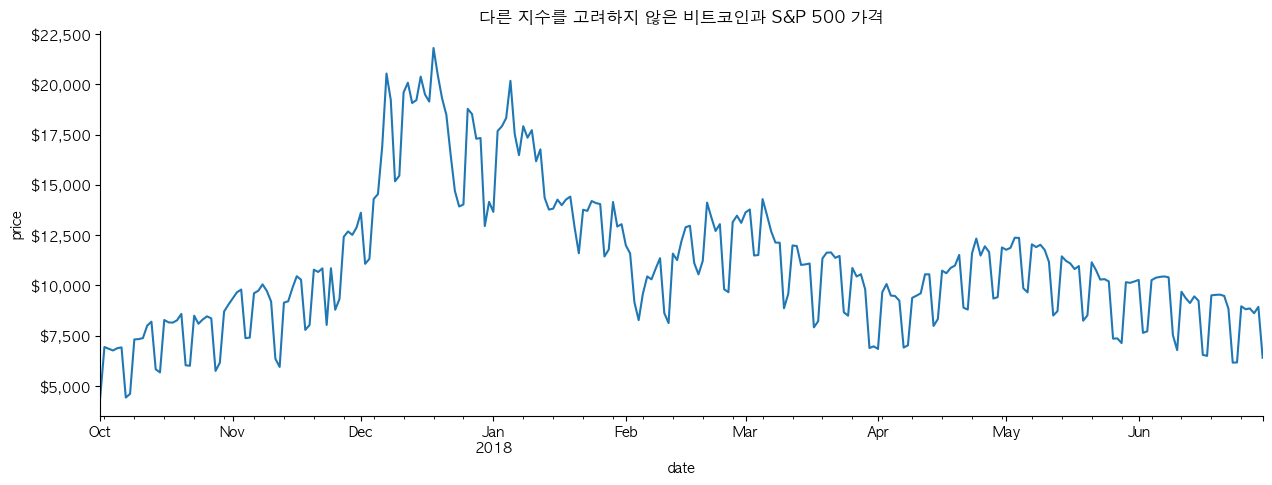

In [78]:
# plot the closing price from Q4 2017 through Q2 2018
ax = portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(15, 5), legend=False,
    title='다른 지수를 고려하지 않은 비트코인과 S&P 500 가격'
)

# formatting
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# show the plot
plt.show()

시각화에서는 반복적인 패턴이 나타나는데 집계는 해당 날짜에서 비트 코인 데이터만 합산했으므로 시장은 마감될 때마다 매일 하락하고 있다.

시장이 닫을 때마다 자산 값이 0으로 떨어지지 않는 것은 분명히 문제다. pandas가 결측된 값을 채우도록 하려면 다음 방법 중 하나를 매개변수로 하는 reindex() 메서드를 사용해 비트코인의 인덱스로 S&P 500 데이터를 재인덱싱 해야한다.

In [79]:
sp.reindex(bitcoin.index).head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,NaN,NaN,NaN,NaN,NaN,Saturday
2017-01-08,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


이제 우리는 일별데이터의 행들을 갖게 되었지만, 모든 주말과 공휴일은 `NaN` 값이 들어가 있다. 이것을 처리하기 위해 우리는 결측값을 어떻게 채울 것인지 method 인수를 통해 지정해준다.

이 경우에는 forward-fill 순방향 채우기로 하면 해당 날 이전에 열렸던 마지막 시장의 데이터로 시장이 닫힌 날의 데이터로 채우기 때문에 금요일의 데이터나 공휴일 이전의 데이터가 들어오게 된다.

* ffill: 이 방법은 값을 앞으로 전달한다. 위의 예제에서 이 방법은 해당 날 이전에 열렸던 마지막 시장의 데이터로 시장이 닫힌 날의 데이터를 채운다

* bfill: 이 방법은 값을 뒤로 전달한다. 미래의 결과를 과거의 날짜의 데이터로 채우는 방법으로 여기서는 맞지 않는다.

* nearest : 이 방법은 결측된 행과 가장 가까운 행의 값으로 채운다. 위의 예에서 일요일의 데이터는 다음 날인 월요일 데이터로 채우고, 토요일 데이터는 전날인 금요일 데이터로 채운다.

In [81]:
sp.reindex(bitcoin.index, method='ffill').head(10)\
    .assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


**이상적으로 주식시장이 마감됐을 때 주가를 유지하고 거래량은 0이 돼야 한다.** 각 열에 대해 다른 방법으로 nan값을 처리해야한다. 어떤 것은 ffill순방향 채우기로, 어떤 것은 0으로 등등... 따라서 assign() 메서드를 사용한다.

`compare()` 메서드는 동일하게-레이블링(같은 인덱스와 열) 된 DataFrame에 따라 다른 값을 보여준다.

`compare()` 메서드를 사용하면 순방향 채우기를 했을 때 **변화된 데이터만 분리**할 수 있다.

In [82]:
sp.reindex(bitcoin.index)\
    .compare(sp.reindex(bitcoin.index, method='ffill'))\
    .head(10).assign(day_of_week=lambda x: x.index.day_name())

high               low              open              close  \
           self        other self        other self        other  self   
date                                                                     
2017-01-07  NaN  2282.100098  NaN  2264.060059  NaN  2271.139893   NaN   
2017-01-08  NaN  2282.100098  NaN  2264.060059  NaN  2271.139893   NaN   
2017-01-14  NaN  2278.679932  NaN  2271.510010  NaN  2272.739990   NaN   
2017-01-15  NaN  2278.679932  NaN  2271.510010  NaN  2272.739990   NaN   
2017-01-16  NaN  2278.679932  NaN  2271.510010  NaN  2272.739990   NaN   
2017-01-21  NaN  2276.959961  NaN  2265.010010  NaN  2269.959961   NaN   
2017-01-22  NaN  2276.959961  NaN  2265.010010  NaN  2269.959961   NaN   
2017-01-28  NaN  2299.020020  NaN  2291.620117  NaN  2299.020020   NaN   
2017-01-29  NaN  2299.020020  NaN  2291.620117  NaN  2299.020020   NaN   
2017-02-04  NaN  2298.310059  NaN  2287.879883  NaN  2288.540039   NaN   

                        volume               day_of_week  
                  other   self         other              
date                                                      
2017-01-07  2276.979980    NaN  3.339890e+09    Saturday  
2017-01-08  2276.979980    NaN  3.339890e+09      Sunday  
2017-01-14  2274.639893    NaN  3.081270e+09    Saturday  
2017-01-15  2274.639893    NaN  3.081270e+09      Sunday  
2017-01-16  2274.639893    NaN  3.081270e+09      Monday  
2017-01-21  2271.310059    NaN  3.524970e+09    Saturday  
2017-01-22  2271.310059    NaN  3.524970e+09      Sunday  
2017-01-28  2294.689941    NaN  3.135890e+09    Saturday  
2017-01-29  2294.689941    NaN  3.135890e+09      Sunday  
2017-02-04  2297.419922    NaN  3.597970e+09    Saturday

남아 있는 열에 대해 **np.where()** 메서드를 사용해 벡터화된 if ... else문을 만든다.

In [83]:
import numpy as np

sp_reindexed = sp.reindex(bitcoin.index).assign(
    volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
    close=lambda x: x.close.fillna(method='ffill'), # carry this forward
    # take the closing price if these aren't available
    open=lambda x: np.where(x.open.isnull(), x.close, x.open), #null값이면 종가가 들어가고 아니면 시가가들어간다.
    high=lambda x: np.where(x.high.isnull(), x.close, x.high),
    low=lambda x: np.where(x.low.isnull(), x.close, x.low)
)
sp_reindexed.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


If we create a visualization comparing the reindexed data to the first attempt, we see how reindexing helped maintain the asset value when the market was closed:
여기서는 np.where을 사용해 내부적으로 어떤 일이 일어나는지 알기 쉽도록 했지만, combine_first() 메서드로 대체할 수 있다.

위의 코드와 같게 하려면, x.open.combine_first(x.close)와 같다.

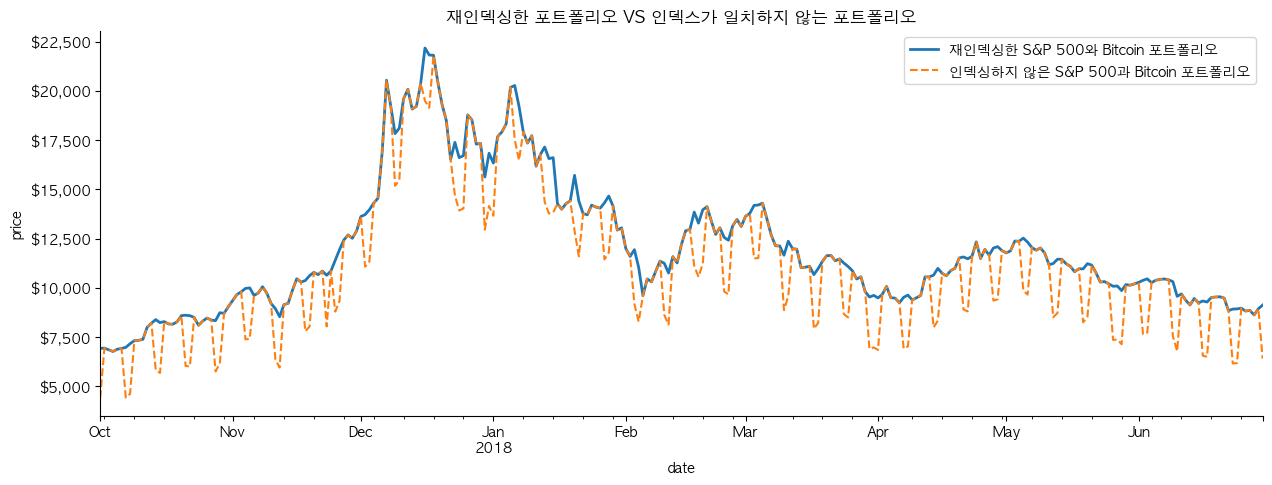

In [87]:
# every day's closing price = S&P 500 close adjusted for market closure + Bitcoin close (same for other metrics)
fixed_portfolio = sp_reindexed + bitcoin

# plot the reindexed portfolio's closing price from Q4 2017 through Q2 2018
ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', label='재인덱싱한 S&P 500와 Bitcoin 포트폴리오', figsize=(15, 5), linewidth=2, 
    title='재인덱싱한 포트폴리오 VS 인덱스가 일치하지 않는 포트폴리오'
)

# add line for original portfolio for comparison
# 비교를 위해 원 포트폴리오 그림 추가
portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', ax=ax, linestyle='--', label='인덱싱하지 않은 S&P 500과 Bitcoin 포트폴리오'
)

# formatting
# 축 이름 변경
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()

<hr>
<div>
    <a href="./2-using_the_weather_api.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="./4-reshaping_data.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>